# Plot on geometry elements {#plot_on_geometries}

This example shows how to plot a certain field in different geometric
objects such as points, lines and planes.


# Imports and load model

Import modules and set context as Premium.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ansys.dpf import core as dpf
from ansys.dpf.core import examples
from ansys.dpf.core import operators as ops
from ansys.dpf.core.geometry import Line, Plane, Points
from ansys.dpf.core.plotter import DpfPlotter
from ansys.dpf.core.fields_factory import field_from_array

Load model from examples and print information:


In [2]:
model = dpf.Model(examples.find_static_rst())
print(model)

DPF Model
------------------------------
Static analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
     -  structural_temperature: ElementalNodal Temperature
------------------------------
DPF  Meshed Region: 
  81 nodes 
  8 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 1 
Cumulative     Time (s)       LoadStep       Sub

Load model\'s mesh and define camera position (obtained with
`cpos=pl.show_figure(return_cpos=True)`). This will be used later for
plotting.


In [3]:
mesh = model.metadata.meshed_region
cpos = [
    (0.07635352356975698, 0.1200500294271993, 0.041072502929096165),
    (0.015, 0.045, 0.015),
    (-0.16771051558419411, -0.1983722658245161, 0.9656715938216944),
]

# Create points, line and plane objects

Create 8 points in the corners and one in the middle:


In [4]:
points = Points(
    [
        [0.0, 0.03, 0.0],
        [0.0, 0.03, 0.03],
        [0.0, 0.06, 0.00],
        [0.0, 0.06, 0.03],
        [0.03, 0.03, 0.0],
        [0.03, 0.03, 0.03],
        [0.03, 0.06, 0.00],
        [0.03, 0.06, 0.03],
        [0.015, 0.045, 0.015],
    ]
)

Show points together with the mesh


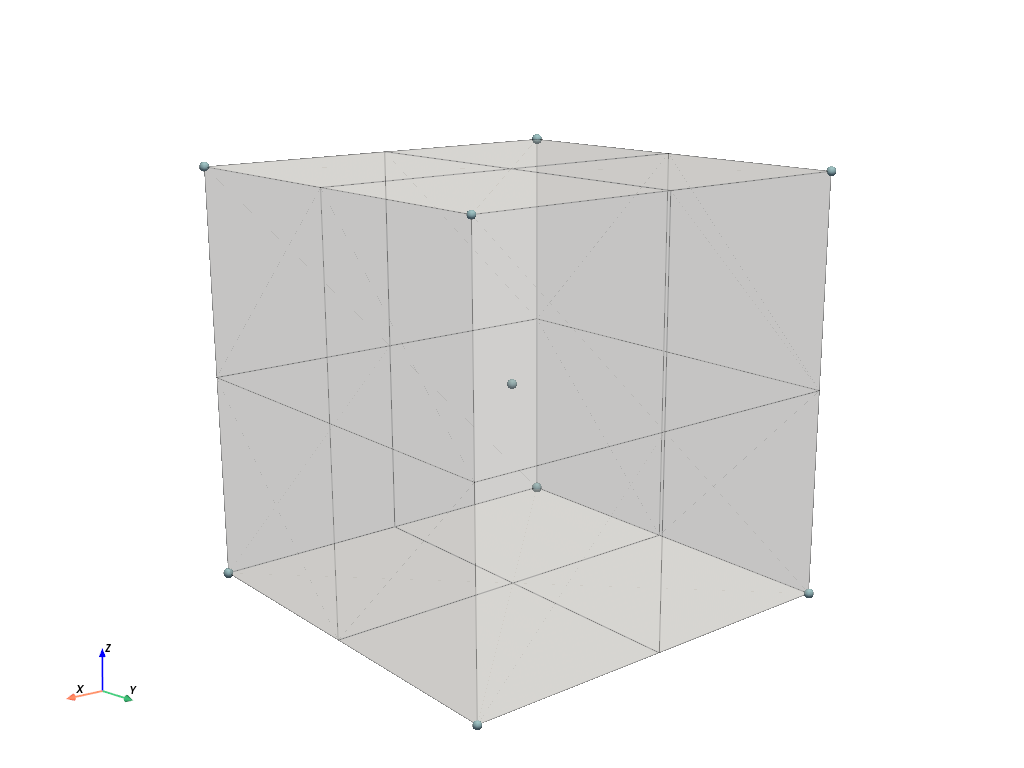

In [5]:
points.plot(mesh, cpos=cpos)

Create line passing through the geometry\'s diagonal:


In [6]:
line = Line([[0.03, 0.03, 0.05], [0.0, 0.06, 0.0]], n_points=50)

Show line with the 3D mesh


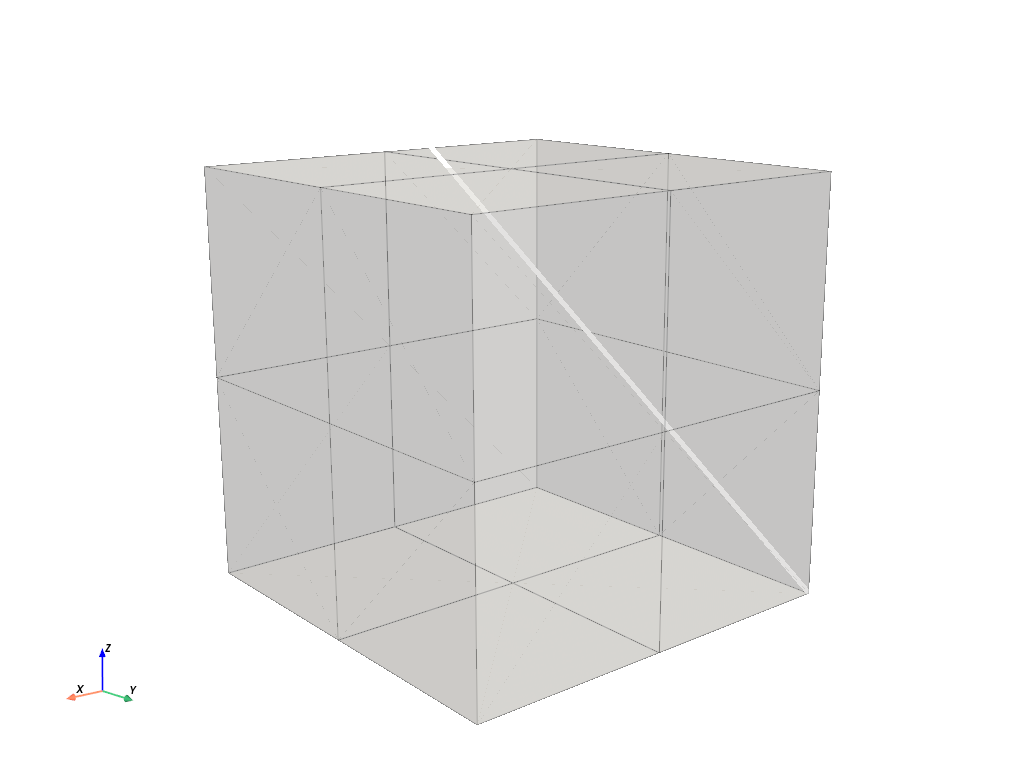

In [7]:
line.plot(mesh, cpos=cpos)

Create vertical plane passing through the mid point:


In [8]:
plane = Plane(
    [0.015, 0.045, 0.015],
    [1, 1, 0],
    width=0.03,
    height=0.03,
    n_cells_x=10,
    n_cells_y=10,
)

Show plane with the 3D mesh


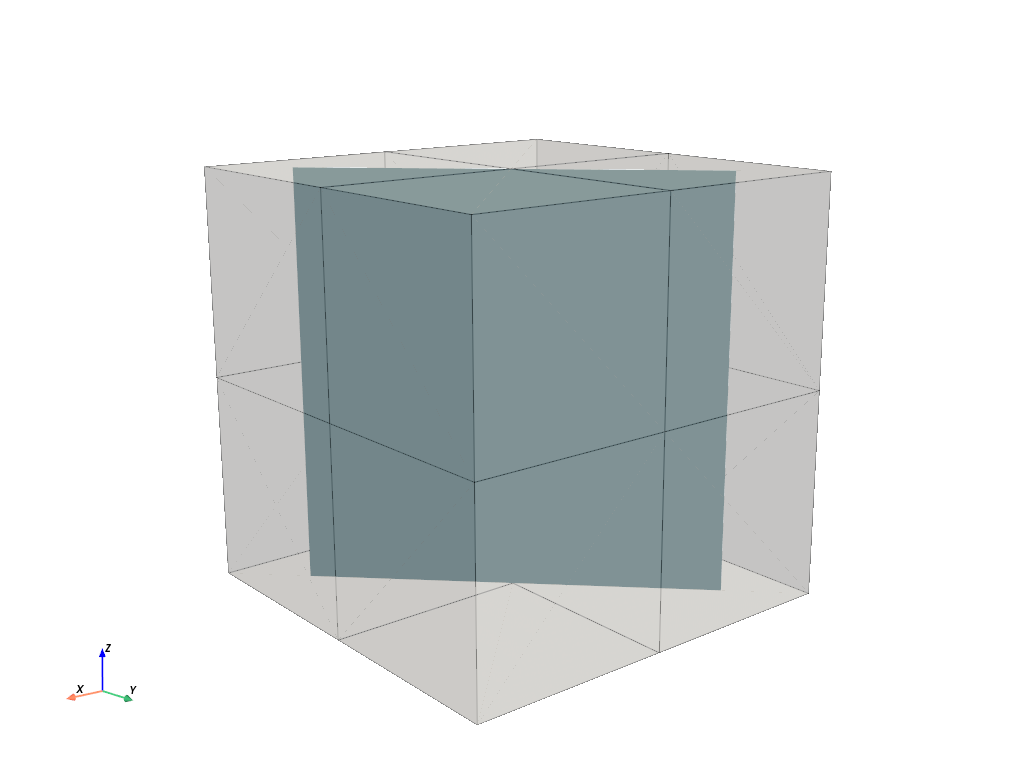

In [9]:
plane.plot(mesh, cpos=cpos)

# Map displacement field to geometry objects

Get displacement field from model:


In [10]:
disp = model.results.displacement

Map displacement to points in Points object:


In [11]:
mapping_operator = ops.mapping.on_coordinates(
    fields_container=disp,
    coordinates=field_from_array(points.coordinates.data),
    create_support=True,
    mesh=mesh,
)
fields_mapped = mapping_operator.outputs.fields_container()
field_points = fields_mapped[0]

Map displacement to points in Line object:


In [12]:
mapping_operator = ops.mapping.on_coordinates(
    fields_container=disp,
    coordinates=line.mesh.nodes.coordinates_field,
    create_support=True,
    mesh=mesh,
)
fields_mapped = mapping_operator.outputs.fields_container()
field_line = fields_mapped[0]

Map displacement to points in Plane object:


In [13]:
mapping_operator = ops.mapping.on_coordinates(
    fields_container=disp,
    coordinates=plane.mesh.nodes.coordinates_field,
    create_support=True,
    mesh=mesh,
)
fields_mapped = mapping_operator.outputs.fields_container()
field_plane = fields_mapped[0]

# Plotting displacement field on the geometry objects

3D plot of Points and display mesh:


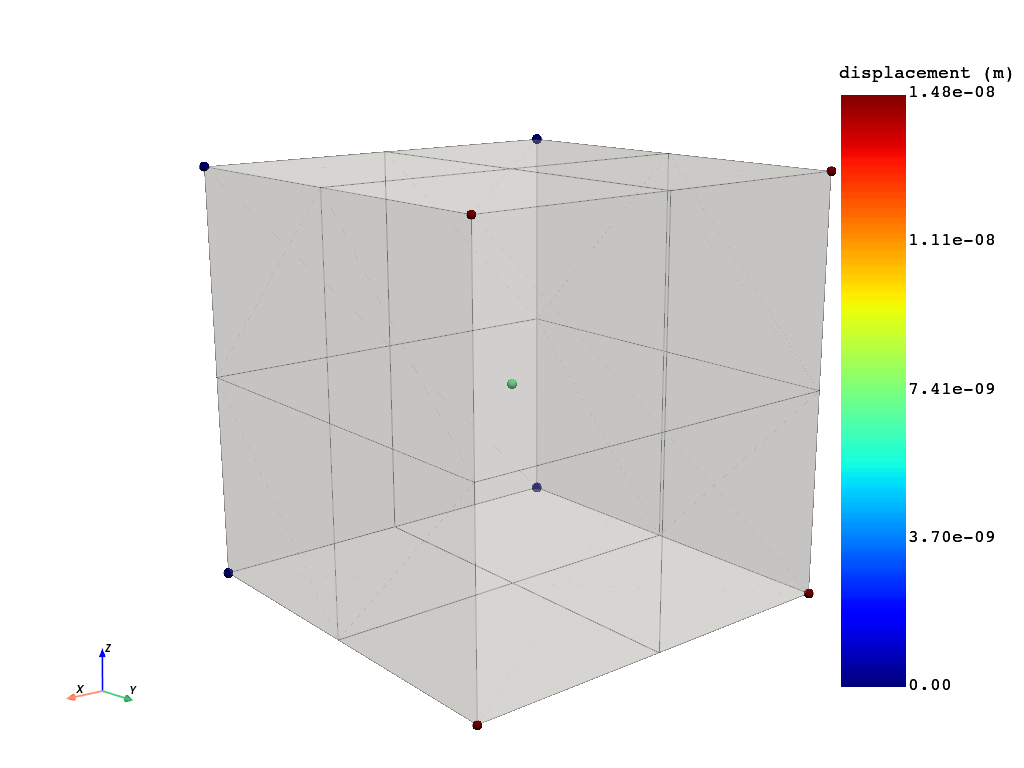

In [14]:
pl = DpfPlotter()
pl.add_field(field_points, render_points_as_spheres=True, point_size=10)
pl.add_mesh(mesh, style="surface", show_edges=True, color="w", opacity=0.3)
pl.show_figure(show_axes=True, cpos=cpos)

3D plot of Line and mesh. Note that the line is only displayed if some
points are found inside the mesh:


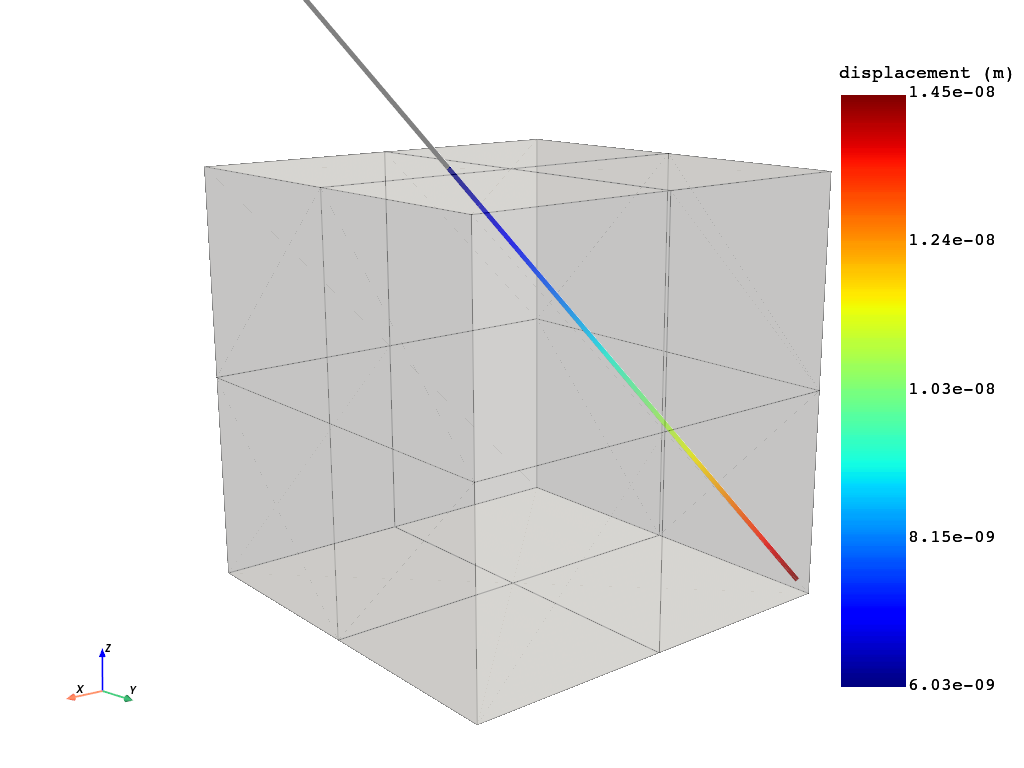

In [15]:
pl = DpfPlotter()
if not len(field_line) == 0:
    pl.add_field(field_line, line.mesh, line_width=5)
pl.add_mesh(mesh, style="surface", show_edges=True, color="w", opacity=0.3)
pl.show_figure(show_axes=True, cpos=cpos)

Plot Plane and display mesh in background. Note that the plane is only
displayed if some points are found inside the mesh:


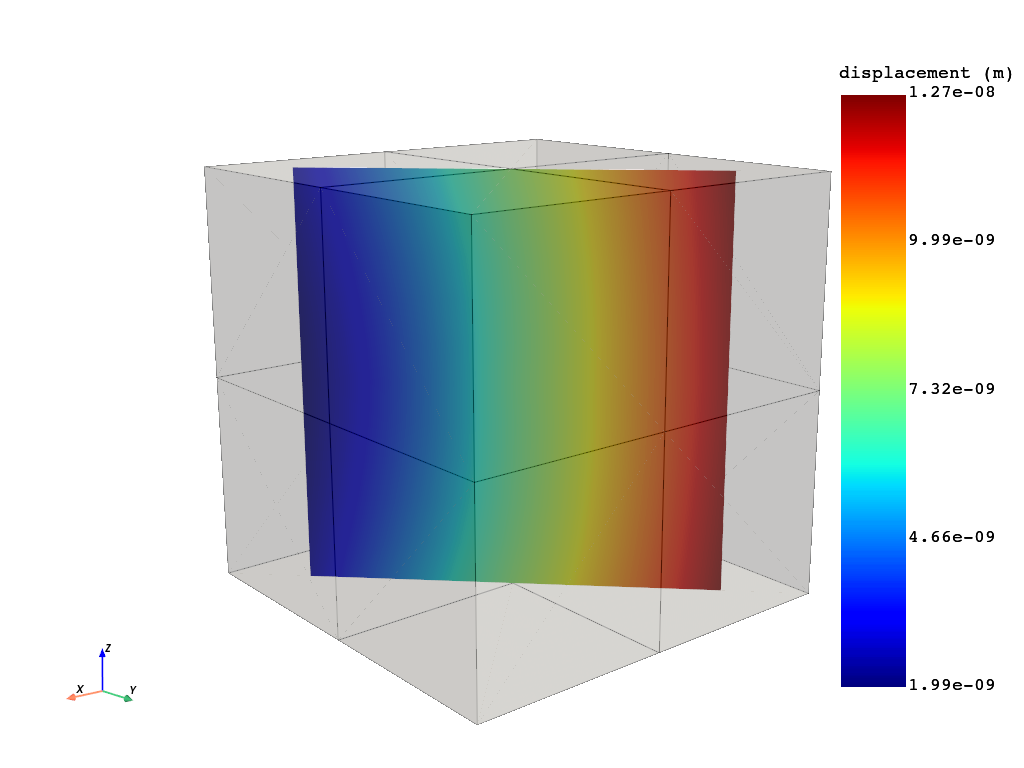

In [16]:
pl = DpfPlotter()
if not len(field_plane) == 0:
    pl.add_field(field_plane, plane.mesh, show_edges=False)
pl.add_mesh(mesh, style="surface", show_edges=True, color="w", opacity=0.3)
pl.show_figure(show_axes=True, cpos=cpos)

2D plot (graph) of Line (line length vs displacement field):


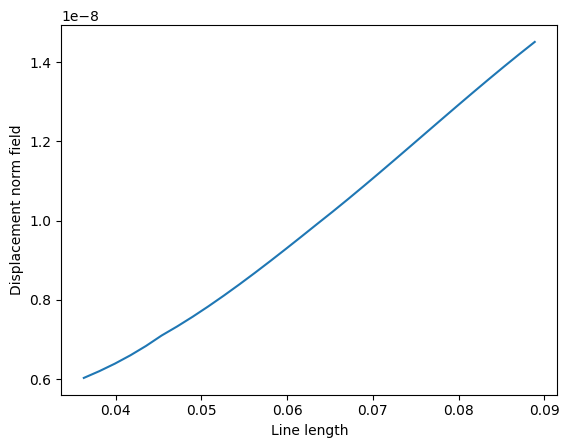

In [17]:
norm_disp = [np.linalg.norm(field_line.data[i]) for i in range(len(field_line.data))]
path = line.path[field_line.scoping.ids - 1]
plt.plot(path, norm_disp)
plt.xlabel("Line length")
plt.ylabel("Displacement norm field")
plt.show()